# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
list_of_city_id = []
list_of_city_name = []
list_of_country = []
list_of_lng = []
list_of_lat = []
list_of_temp = []
list_of_humidity = []
list_of_clouds = []
list_wind_speed = []

# Looping through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        list_of_city_id.append(city_id)
            
        city_name = response_json['name']
        list_of_city_name.append(city_name)
        
        country_name = response_json['sys']['country']
        list_of_country.append(country_name)

        lng = response_json['coord']['lon']
        list_of_lng.append(lng)

        lat = response_json['coord']['lat']
        list_of_lat.append(lat)

        temp = response_json['main']['temp']
        list_of_temp.append(temp)

        humidity = response_json['main']['humidity']
        list_of_humidity.append(humidity)

        clouds = response_json['clouds']['all']
        list_of_clouds.append(clouds)

        wind_speed = response_json['wind']['speed']
        list_wind_speed.append(wind_speed)
        
        
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")


City Name: bethel, City ID: 5282297
City Name: mataura, City ID: 6201424
City Name: ponta do sol, City ID: 2264557
City Name: longyearbyen, City ID: 2729907
That record does not exist, searching for next record...
That record does not exist, searching for next record...
City Name: rehoboth, City ID: 3353540
City Name: maceio, City ID: 3395981
City Name: onguday, City ID: 1496130
City Name: krabi, City ID: 1152633
City Name: castro, City ID: 3466704
City Name: busselton, City ID: 2075265
That record does not exist, searching for next record...
City Name: avarua, City ID: 4035715
City Name: cassilandia, City ID: 3466750
City Name: nantucket, City ID: 4944903
City Name: la ronge, City ID: 6050066
City Name: pahrump, City ID: 5509851
City Name: hithadhoo, City ID: 1282256
City Name: aketi, City ID: 220448
City Name: dingle, City ID: 1714733
That record does not exist, searching for next record...
City Name: sao filipe, City ID: 3374210
City Name: chokurdakh, City ID: 2126123
City Name: sai

City Name: tornio, City ID: 634093
City Name: husavik, City ID: 2629833
That record does not exist, searching for next record...
City Name: dunedin, City ID: 2191562
City Name: bambous virieux, City ID: 1106677
That record does not exist, searching for next record...
City Name: umarkot, City ID: 1162959
City Name: khatanga, City ID: 2022572
City Name: kathu, City ID: 1153035
City Name: abong mbang, City ID: 2236053
City Name: nanlong, City ID: 1799908
City Name: clyde river, City ID: 5924351
City Name: laohekou, City ID: 1804386
City Name: faanui, City ID: 4034551
City Name: yuci, City ID: 1785974
City Name: laguna, City ID: 5364271
City Name: esperance, City ID: 2071860
City Name: bow island, City ID: 5906757
City Name: ballina, City ID: 2177069
City Name: fortuna, City ID: 5563839
City Name: vila franca do campo, City ID: 3372472
City Name: pangoa, City ID: 3933104
City Name: boende, City ID: 218680
City Name: kasongo-lunda, City ID: 2315026
City Name: kirensk, City ID: 2022083
City 

City Name: bud, City ID: 4255151
City Name: kashi, City ID: 1280849
That record does not exist, searching for next record...
That record does not exist, searching for next record...
City Name: kalinagar, City ID: 1268399
City Name: victoria, City ID: 1819729
City Name: mersing, City ID: 1732826
City Name: catio, City ID: 2373526
That record does not exist, searching for next record...
City Name: inuvik, City ID: 5983607
City Name: kaduqli, City ID: 373141
City Name: byron bay, City ID: 2172880
City Name: yanam, City ID: 1252795
City Name: grand-santi, City ID: 3381538
City Name: moree, City ID: 2156927
City Name: shima, City ID: 1795166
City Name: chapais, City ID: 5919850
City Name: mankono, City ID: 2284589
City Name: reyes, City ID: 3906478
City Name: half moon bay, City ID: 5354943
City Name: awjilah, City ID: 88533
City Name: guerrero negro, City ID: 4021858
City Name: kawalu, City ID: 1640902
City Name: norman wells, City ID: 6089245
That record does not exist, searching for next

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Changing data into a dataframe
cities_data_df = pd.DataFrame({"City ID": list_of_city_id, "City": list_of_city_name, "Country": list_of_country, "Lat": list_of_lat, "Lng": list_of_lng,
                         "Temperature": list_of_temp, "Humidity": list_of_humidity, "Clouds": list_of_clouds,
                         "Wind Speed": list_wind_speed})
cities_data_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,5282297,Bethel,US,41.3712,-73.4140,66.25,37,90,10.36
1,6201424,Mataura,NZ,-46.1927,168.8643,37.58,94,89,11.68
2,2264557,Ponta do Sol,PT,32.6667,-17.1000,59.23,71,73,3.00
3,2729907,Longyearbyen,SJ,78.2186,15.6401,21.20,86,0,8.05
4,3353540,Rehoboth,NA,-23.3167,17.0833,60.26,30,7,1.25


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

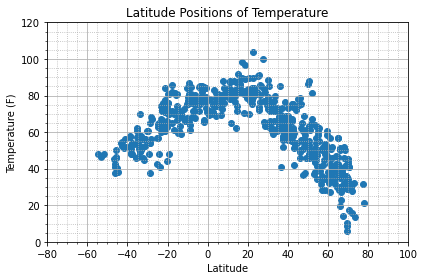

In [14]:
x_values = cities_data_df["Lat"]
y_values = cities_data_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Latitude Positions of Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 120)
plt.xlim(-80, 100)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

## Latitude vs. Humidity Plot

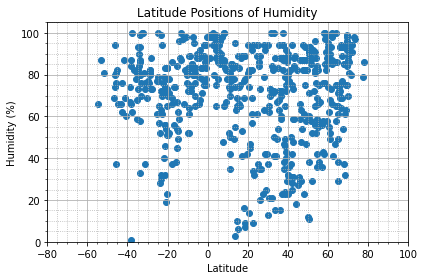

In [15]:
x_values = cities_data_df["Lat"]
y_values = cities_data_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Latitude Positions of Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-80, 100)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

## Latitude vs. Cloudiness Plot

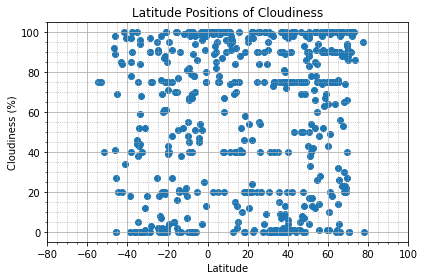

In [16]:
x_values = cities_data_df["Lat"]
y_values = cities_data_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Latitude Positions of Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-80, 100)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

## Latitude vs. Wind Speed Plot

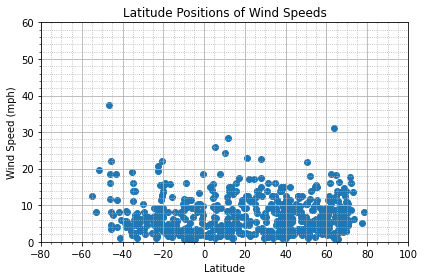

In [17]:
x_values = cities_data_df["Lat"]
y_values = cities_data_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Latitude Positions of Wind Speeds')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 60)
plt.xlim(-80, 100)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

## Linear Regression

In [32]:
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
   # plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

In [25]:
# Creating North and South Hemisphere DataFrames
data = cities_data_df['Lat'] > 0
north_hemisphere = cities_data_df[data]
south_hemisphere = cities_data_df[~data]
north_hemisphere.head()
south_hemisphere.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
1,6201424,Mataura,NZ,-46.1927,168.8643,37.58,94,89,11.68
4,3353540,Rehoboth,NA,-23.3167,17.0833,60.26,30,7,1.25
5,3395981,Maceió,BR,-9.6658,-35.7353,75.20,83,0,3.44
8,3466704,Castro,BR,-24.7911,-50.0119,56.64,79,2,2.08
9,2075265,Busselton,AU,-33.6500,115.3333,57.99,99,84,6.29


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8440911791858714


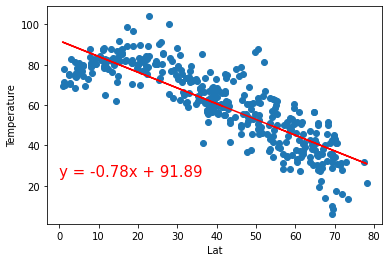

In [39]:
x_label = "Lat"
y_label = "Temperature"
label_position = (0,25)
plotLinearRegression(north_hemisphere[x_label],north_hemisphere[y_label],x_label,y_label,label_position,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7975218938050719


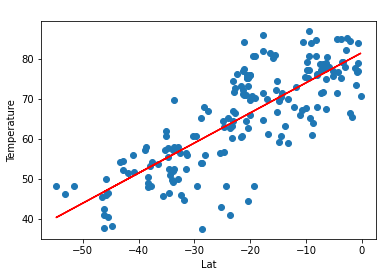

In [38]:
x_label = "Lat"
y_label = "Temperature"
label_positions = (-55,90)
plotLinearRegression(south_hemisphere[x_label],south_hemisphere[y_label],x_label,y_label,label_positions,6)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression